# Random Forest Classifier  - Pima Indian Dataset
In this project i apply the random forest classifier ML model to predict whether a patient has diabetes or not based on the data provided. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from matplotlib import rcParams
import warnings

warnings.filterwarnings("ignore")

# figure size in inches
rcParams["figure.figsize"] = 10, 6
np.random.seed(42)

In [2]:
data =pd.read_csv("C:\\Users\\hp\\Desktop\\Reviving python\\Datasets\\diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

there are 8 input features and one target feature(the one that says whether patient is diabetic or not)

In [6]:
#split data into dependent and independent variables
#the target feature is called "outcome"
X = data.drop("Outcome", axis = 1)
y = data["Outcome"]

In [7]:
#Preprocess the data before model creation by standardizing the independent features using the
#standardScalar method in the scikit-learn

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

PS: Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. This is why we need to standardize all the variables

In [8]:
#split the data into train and test sets
X_train, X_test, y_train, y_test =train_test_split(X_scaled, y, stratify=y, test_size=0.10, random_state=42
)


Building the Random Forest Classifier

Now is time to create our random forest classifier and then train it on the train set. We will also pass the number of trees (100) in the forest we want to use through the parameter called n_estimators. 

In [9]:
#create classifier
classifier = RandomForestClassifier(n_estimators=100)

#Train the model using the training data sets
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

PS: The above output shows different parameter values of the random forest classifier used during the training process on the train data. 

In [10]:
#lets use the model to predict the test data
y_predict = classifier.predict(X_test)

In [11]:
print ('Model Accuracy is', accuracy_score(y_test,y_predict) )

Model Accuracy is 0.8051948051948052


In [12]:
#check the importance of each of the features in the model
feature_importance_df = pd.DataFrame({"feature":list(X.columns), "importance": classifier.feature_importances_}).sort_values("importance", ascending =False)
#display
feature_importance_df

,feature,importance
1,Glucose,0.267507
5,BMI,0.165052
7,Age,0.127832
6,DiabetesPedigreeFunction,0.125821
2,BloodPressure,0.088390
0,Pregnancies,0.084357
4,Insulin,0.074113
3,SkinThickness,0.066928


The output above indicates that glucose, BMI, age and diabetes pedigre function are the most important predictors of diabetes as is expected in real life!!!! 

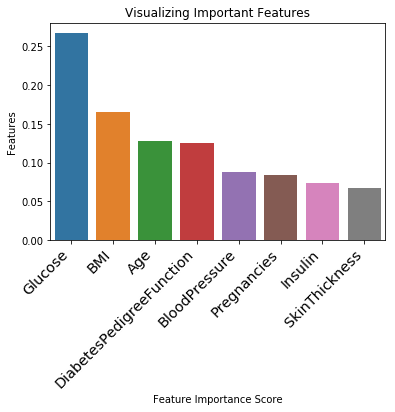

In [13]:
#lets create a visual of importance
sns.barplot(x = feature_importance_df.feature, y =feature_importance_df.importance)

#Add labels and titles
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large")
plt.show()

from the output above, skin thisckness claerly is of low importance. 
lets drop it to see if it will improve the function of out model



In [14]:
X = data.drop(["Outcome","SkinThickness"], axis = 1 )
y = data.Outcome

# standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, test_size=0.10, random_state=42)

In [17]:
#create classifier
cls = RandomForestClassifier(n_estimators = 100)
#train model
cls.fit(X_train,y_train)
#predict 
y_predict = cls.predict(X_test)

#model accuracy
print ('model accuracy is', accuracy_score(y_test, y_predict))



model accuracy is 0.8181818181818182


so by removing the 'skinThickness' and increasing the trees to 200, we have improved the accuracy of the model from 80% to 81%
GREAT!!

It is therefore v. important to purse through your data to see which variables contribute least to your model as removing them can increase your data accuracy